<h1 style="text-align: center">
Titanic Dataset Classification: Logistic Regression vs Neural Networks
</h1>

In [2]:
name = "Radin Cheraghi"
student_number = "401105815"

In this assignment, you'll use the Titanic dataset to predict whether a passenger survived or not. This is a binary classification task, and you're going to apply two different machine learning models: Logistic Regression and Neural Networks. Then you will compare the performance of these two models, focusing on metrics such as accuracy, precision, and recall. Also, you'll explore data preprocessing, feature scaling, and regularization techniques to enhance model performance. <br></br>
The Titanic dataset contains information about the passengers aboard the Titanic, including details like their age, gender, ticket class, and whether they survived the disaster. Our objective is to use this information to classify passengers as survivors or non-survivors.

#### Load the necessary libraries:

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from google.colab import files
import matplotlib.pyplot as plt

### Load the dataset:

In [4]:
# TODO Load the dataset
df =  pd.read_csv('train.csv')

# TODO Display the first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preprocessing

Now you should explore the dataset in more detail:

In [5]:
# TODO Check for missing values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# TODO Get statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# TODO
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fill missing ages with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

# Drop 'Cabin' column due to too many missing values
df.drop('Cabin', axis = 1, inplace = True)

# Encode categorical variables into numeric form
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

# Drop unuseful columns
df.drop('PassengerId', axis = 1, inplace = True)
df.drop('Name', axis = 1, inplace = True)
df.drop('Ticket', axis = 1, inplace = True)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


Split the data into training and testing sets. Also, remember to add a bias term.

In [8]:
# TODO
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler = MinMaxScaler()
X = df.drop('Survived', axis = 1)
y = df['Survived'].map({0: -1, 1: 1})

X = X.to_numpy()
y = y.to_numpy()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
X_train = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Logistic Regression

Implement logistic regression for classifying Titanic passengers from scratch (without using the sklearn)!

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
      # TODO
      self.learning_rate = learning_rate
      self.num_iterations = num_iterations
      self.weights = np.random.randn(8)

    def sigmoid(self, z):
      # TODO
      return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
      for epoch in range(self.num_iterations):
        gradient = self.calculate_gradient(X,y)
        self.weights -= gradient * self.learning_rate

    def calculate_gradient(self, X, y):
      N = X.shape[0]
      gradient = np.zeros(X[0].shape[0])
      for n in range(N):
        gradient += (y[n] * X[n]) / (1 + np.exp(y[n] * np.dot(self.weights, X[n])))
      return gradient * (-1) / N

    def predict(self, X):
      # TODO
      vector = self.sigmoid(np.dot(X, self.weights))
      transformed_vector = np.where(vector < 0.5, -1, 1)
      return transformed_vector


Train the model with your implemented logistic regression:

In [ ]:
# TODO
model = LogisticRegression()
model.fit(X_train, y_train)

### Model Evaluation

Evaluate the logistic regression algorithm by calculating accuracy and the confusion matrix from scratch.

In [ ]:
# TODO Accuracy calculation
def calculate_accuracy(y_true, y_pred):
  # TODO
  mis_count = 0
  N = y_true.shape[0]
  for i in range(N):
    if y_true[i] != y_pred[i]:
      mis_count += 1
  return 1 - (mis_count) / N

y_pred = model.predict(X_test)
print(f'Accuracy (Logistic Regression from Scratch): {calculate_accuracy(y_test, y_pred)}')

Accuracy (Logistic Regression from Scratch): 0.782122905027933


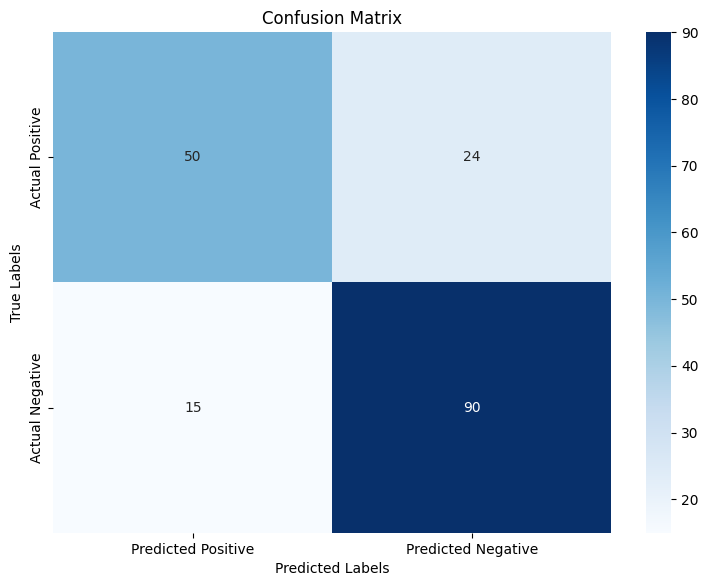

In [ ]:
# TODO Confusion matrix calculation
def confusion_matrix_manual(y_true, y_pred):
  # TODO
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  N = y_true.shape[0]
  for i in range(N):
    if y_true[i] == y_pred[i] and y_pred[i] == 1:
      TP += 1
    if y_true[i] != y_pred[i] and y_pred[i] == 1:
      FP += 1
    if y_true[i] == y_pred[i] and y_pred[i] == -1:
      TN += 1
    if y_true[i] != y_pred[i] and y_pred[i] == -1:
      FN += 1
  confusion_matrix = [[TP, FN], [FP, TN]]
  return confusion_matrix

# TODO Plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
  # TODO
  plt.figure(figsize=(9, 6.5))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True,
              xticklabels=["Predicted Positive", "Predicted Negative"],
              yticklabels=["Actual Positive", "Actual Negative"])

  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title("Confusion Matrix")
  plt.show()

y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix_manual(y_test, y_pred)
plot_confusion_matrix(confusion_matrix)

Calculate Precision, Recall, and F1-Score.

In [ ]:
# TODO Calculate precision, recall, and F1-score
def precision_recall_f1(TP, FP, FN):
  # TODO
  Precision = 0
  if TP + FP != 0:
    Precision = TP / (TP + FP)
  Recall = 0
  if TP + FN != 0:
    Recall = TP / (TP + FN)
  F1_Score = 0
  if (Precision + Recall) != 0:
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
  return Precision, Recall, F1_Score

y_pred = model.predict(X_test)
confusion_matrix = confusion_matrix_manual(y_test, y_pred)
Precision, Recall, F1_Score = precision_recall_f1(confusion_matrix[0][0], confusion_matrix[1][0], confusion_matrix[0][1])
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')
print(f'F1-Score: {F1_Score}')

Precision: 0.7692307692307693
Recall: 0.6756756756756757
F1-Score: 0.7194244604316546


Now implement logistic regression using sklearn.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# TODO Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)
# TODO Predict on test set
y_pred = model.predict(X_test)

Calculate accuracy:

In [ ]:
# TODO
accuracy = accuracy_score(y_test, y_pred)
print(f'Sklearn Accuracy (Logistic Regression): {accuracy}')

Sklearn Accuracy (Logistic Regression): 0.7988826815642458


Plot confusion matrix:

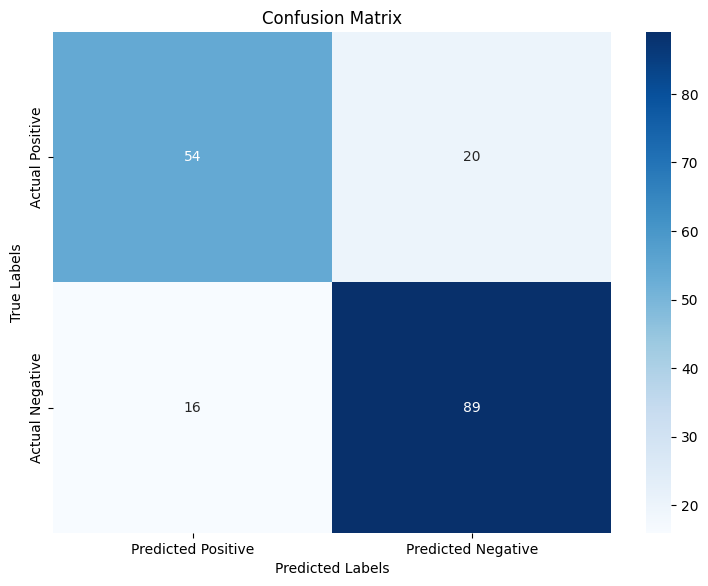

In [ ]:
# TODO
confusion_matrix = confusion_matrix_manual(y_test, y_pred)
plot_confusion_matrix(confusion_matrix)

In [ ]:
Precision, Recall, F1_Score = precision_recall_f1(confusion_matrix[0][0], confusion_matrix[1][0], confusion_matrix[0][1])
print(f'Precision: {Precision}')
print(f'Recall: {Recall}')
print(f'F1-Score: {F1_Score}')

Precision: 0.7714285714285715
Recall: 0.7297297297297297
F1-Score: 0.75


#### Question:
Compare the results of your manually implemented logisitic regression with the sklearn LogisticRegression:

#### Answer: Loss of our model is greater than skylearn built-in model about 2 percent. Also we can see that built-in model performs better with respect to Precision, Recall and F1-Score but the difference is not high. It could because of difference between exploited training algorithms that each model use.

### Logistic Regression with Regularization (L1 and L2)

As you may know, regularization helps prevent overfitting by penalizing large coefficients in the model. You will apply L1 (Lasso) and L2 (Ridge) regularization (from scratch) to the logistic regression model.

In [ ]:
class LogisticRegressionWithRegularization:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization='none', lambda_=0.01):
      self.learning_rate = learning_rate
      self.num_iterations = num_iterations
      self.weights = np.random.randn(8)
      self.regularization = regularization
      self.lambda_ = lambda_

    def sigmoid(self, z):
      # TODO
      return 1 / (1 + np.exp(-z))

    def calculate_gradient(self, X, y):
      N = X.shape[0]
      cross_ent_grad = np.zeros(X[0].shape[0])
      for n in range(N):
        cross_ent_grad += (y[n] * X[n]) / (1 + np.exp(y[n] * np.dot(self.weights, X[n])))
      cross_ent_grad = cross_ent_grad * (-1) / N
      total_grad = cross_ent_grad
      if self.regularization == 'L1':
        sign_vector = np.where(self.weights < 0, -1, 1)
        total_grad += self.lambda_ * sign_vector
      if self.regularization == 'L2':
        total_grad += self.lambda_ * self.weights
      return total_grad

    def fit(self, X, y):
      for epoch in range(self.num_iterations):
        gradient = self.calculate_gradient(X,y)
        self.weights -= gradient * self.learning_rate

    def predict(self, X):
      # TODO
      vector = self.sigmoid(np.dot(X, self.weights))
      transformed_vector = np.where(vector < 0.5, -1, 1)
      return transformed_vector

In [ ]:
# TODO Function to calculate accuracy
def calculate_accuracy_new(y_true, y_pred):
  # TODO
  mis_count = 0
  N = y_true.shape[0]
  for i in range(N):
    if y_true[i] != y_pred[i]:
      mis_count += 1
  return 1 - (mis_count) / N

Train Logistic Regression with L2 (Ridge):

In [ ]:
# TODO
model_with_L2 = LogisticRegressionWithRegularization(regularization= 'L2')
model_with_L2.fit(X_train, y_train)
y_pred_L2 = model_with_L2.predict(X_test)
accuracy_percent = calculate_accuracy_new(y_test, y_pred_L2) * 100
print(f'L2 Regularization Logistic Regression Accuracy: {accuracy_percent: .2f}%')

L2 Regularization Logistic Regression Accuracy:  79.33%


Train Logistic Regression with L1 (Lasso):

In [ ]:
# TODO
model_with_L1 = LogisticRegressionWithRegularization(regularization= 'L1')
model_with_L1.fit(X_train, y_train)
y_pred_L1 = model_with_L1.predict(X_test)
accuracy_percent = calculate_accuracy_new(y_test, y_pred_L1) * 100
print(f'L1 Regularization Logistic Regression Accuracy: {accuracy_percent: .2f}%')

L1 Regularization Logistic Regression Accuracy:  74.86%


#### Question: Compare the results with the simple logistic regression.

#### Answer: Training model with regularization tricks usually prevents model overfitting and causes better accuracy over test data. In our case after applying L2 regularization accuracy gets better but applying L1 regularization reduces accuracy. This could because of random initialization of weights.

# Neural Network (MLP)

Now, you will build a simple neural network using Multi-Layer Perceptron (MLP). The model should consist of an input layer, one hidden layer with sigmoid activation, and an output layer. Implement the nueral network from scratch.

In [36]:
import numpy as np

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01, num_iterations=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def sigmoid_derivative(self, z):
        return z * (1 - z)

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2

    def cross_entropy_loss(self, y, output):
        y_adjusted = (y + 1) / 2
        return -np.mean(y_adjusted * np.log(output) + (1 - y_adjusted) * np.log(1 - output))

    def backward(self, X, y, output):
        y_adjusted = (y + 1) / 2

        output_error = output - y_adjusted
        output_delta = output_error * self.sigmoid_derivative(output)

        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.A1)

        self.W2 -= self.learning_rate * np.dot(self.A1.T, output_delta)
        self.b2 -= self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.W1 -= self.learning_rate * np.dot(X.T, hidden_delta)
        self.b1 -= self.learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

    def fit(self, X, y):
        for i in range(self.num_iterations):
            output = self.forward(X)

            loss = self.cross_entropy_loss(y, output)

            self.backward(X, y, output)
            # print(f"Iteration {i}, Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return np.where(output > 0.5, 1, -1)


Train the neural network model:

In [37]:
# TODO
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

# Train Neural Network
model = NeuralNetwork(input_size=8, hidden_size=3, output_size=1)
model.fit(X_train, y_train)
# Predictions using Neural Network

### Model evaluation

Evaluate the model by calculating accuracy and the confusion matrix.

Calculate the accuracy:

In [38]:
# TODO Accuracy calculation
def calculate_accuracy_NN(y_true, y_pred):
  # TODO
  mis_count = 0
  N = y_true.shape[0]
  for i in range(N):
    if y_true[i] != y_pred[i]:
      mis_count += 1
  return 1 - (mis_count) / N

y_pred = model.predict(X_test)
print(f'Accuracy (NN): {calculate_accuracy_NN(y_test, y_pred)}')

Accuracy (NN): 0.7988826815642458


Plot the confusion matrix:

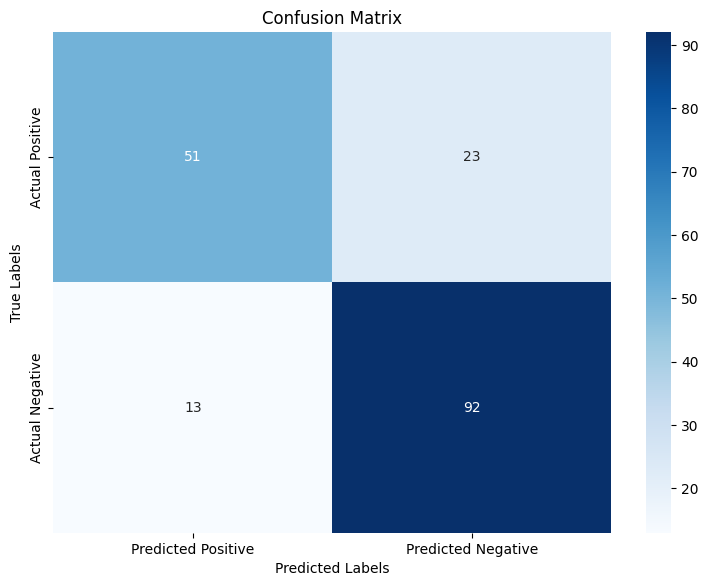

In [39]:
# TODO
def confusion_matrix_NN(y_true, y_pred):
  # TODO
  TP = 0
  FP = 0
  TN = 0
  FN = 0
  N = y_true.shape[0]
  for i in range(N):
    if y_true[i] == y_pred[i] and y_pred[i] == 1:
      TP += 1
    if y_true[i] != y_pred[i] and y_pred[i] == 1:
      FP += 1
    if y_true[i] == y_pred[i] and y_pred[i] == -1:
      TN += 1
    if y_true[i] != y_pred[i] and y_pred[i] == -1:
      FN += 1
  confusion_matrix = [[TP, FN], [FP, TN]]
  return confusion_matrix

def plot_confusion_matrix_NN(confusion_matrix):
  # TODO
  plt.figure(figsize=(9, 6.5))
  sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=True,
              xticklabels=["Predicted Positive", "Predicted Negative"],
              yticklabels=["Actual Positive", "Actual Negative"])

  plt.xlabel("Predicted Labels")
  plt.ylabel("True Labels")
  plt.title("Confusion Matrix")
  plt.show()

confusion_matrix = confusion_matrix_NN(y_test, y_pred)
plot_confusion_matrix_NN(confusion_matrix)

Claculate precision, recall and f1.

In [40]:
# TODO
def precision_recall_f1_NN(TP, FP, FN):
  # TODO
  Precision = 0
  if TP + FP != 0:
    Precision = TP / (TP + FP)
  Recall = 0
  if TP + FN != 0:
    Recall = TP / (TP + FN)
  F1_Score = 0
  if (Precision + Recall) != 0:
    F1_Score = 2 * (Precision * Recall) / (Precision + Recall)
  return Precision, Recall, F1_Score

Precision, Recall, F1_Score = precision_recall_f1_NN(confusion_matrix[0][0], confusion_matrix[1][0], confusion_matrix[0][1])
print(f'Precision (NN): {Precision}')
print(f'Recall (NN): {Recall}')
print(f'F1-Score (NN): {F1_Score}')

Precision (NN): 0.796875
Recall (NN): 0.6891891891891891
F1-Score (NN): 0.7391304347826088
